In [2]:
import pandas as pd

In [3]:
pm_cares = pd.read_csv("../data/India/relief measures/pm_cares.csv")
pm_cares.drop(columns = ["Datetime", "Username", "Tweet Id"], inplace = True)
pm_cares

,Text
0,"""PM cares"" को यह समझाना है कि वह किस तरह से फं..."
1,Very beautiful&amp;meaningful cartoon by THE P...
2,5 BIGGEST LIES of the last few months\n\n❌Ther...
3,The Prime Minister’s Citizen Assistance and Re...
4,@srivatsayb @vivekagnihotri Twist hai sir kya ...
...,...
12864,@prettypadmaja @DrSJaishankar @India_in_Iran C...
12865,@HDFCBank_Cares My loan account number is 0000...
12866,@srivatsayb @Vidyaraj51 Our Honourable PM Modi...
12867,Imagine our miseries. Power Input at 09:25 PM ...


In [9]:
tweet_text_list = pm_cares['Text'].tolist()

tweet_text_list

['"PM cares" को यह समझाना है कि वह किस तरह से फंड इकट्ठा कर रहा है, किससे वह फंड इकट्ठा कर रहा है और किस पर वह अपना फंड खर्च कर रहा है।\n#PMCaresFund #imjktomar https://t.co/jtemwQiNZv',
 "Very beautiful&amp;meaningful cartoon by THE PRINT on home ministry's probe in2Gandhi family’s trusts even as PMCARES fund continues2be shrouded in mystery.Digging in2past without disclosing details of presnt PMCARES Trust .Really paradox.@RahulGandhi @INCIndia @ShashiTharoor https://t.co/8BHCnaUIMi",
 '5 BIGGEST LIES of the last few months\n\n❌There was no incursion by China\n❌No community transmission in India\n❌20L Cr Package helped people\n❌Vikas tried to flee &amp; was encountered \n❌PM CARES used to buy Ventilators',
 'The Prime Minister’s Citizen Assistance and Relief in Emergency Situations Fund, better known as PM CARES, will allocate ₹3,100 crores to COVID-19 relief, including funds for ventilators, migrant workers and vaccine development.\n #TelanganaJansamvadrally',
 "@srivatsayb @vivekag

In [10]:
import numpy as np
import re

In [14]:
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "pm care", "pm cares", "pmcare", "pmcares","vaccinated","vaccination", "weekend", "lockdown", "day", "night", "amp", "pm", "am", "will"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [15]:
cleaned_tweets = [clean_tweet(tw) for tw in tweet_text_list]
cleaned_tweets

<ipython-input-14-d13fc1f1ab32>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['cares',
 'very beautiful meaningful cartoon by print home ministrys probe in2gandhi family s trusts even as fund continues2be shrouded mystery digging in2past without disclosing details presnt trust really paradox',
 '5 biggest lies last few months there was no incursion by china no community transmission india 20l cr package helped people vikas tried flee was encountered cares used buy ventilators',
 'prime minister s citizen assistance relief emergency situations fund better known as cares allocate 3 100 crores covid 19 relief including funds ventilators migrant workers vaccine development',
 'twist hai sir kya kare budget tuv ka hi tha cares didnt produce movie so budget went be tuv',
 'check this awesome video precautions during',
 '',
 '',
 '',
 '9 9',
 'thank you ji behalf people our warangal cares while our cm sleeps',
 'r 20 questions ready relief fund cares amounts made available india foundation etc',
 'have some sense before questioning rfg are not one at same',
 'high tim

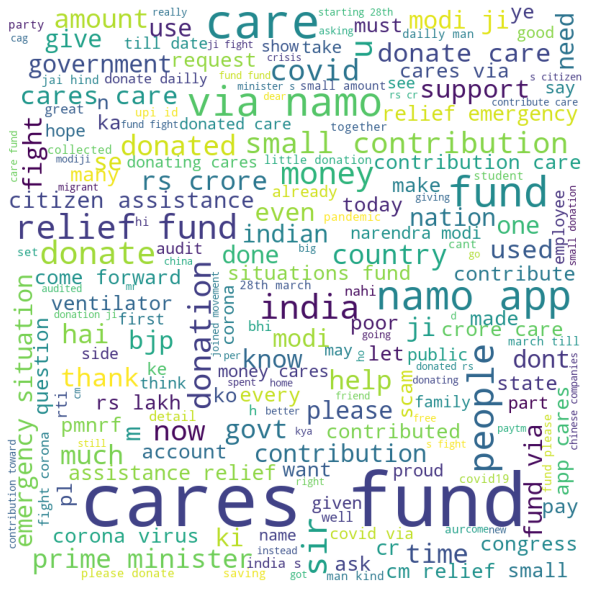

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()